Getting helper functions from github

In [1]:
!git clone https://github.com/Bduz/intro_pytorch.git

Cloning into 'intro_pytorch'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


# 0 - Load all the Necessary Modules


In [2]:
import sys
sys.path.insert(0, '/content/intro_pytorch/')

In [3]:
import numpy as np
import torch 
from torch import nn        #you dont have to do this, you can call torch.nn 
from torch import optim     #you dont have to do this, you can call torch.optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

import helperfuncs

#1 - Load and Process the Data

Load the MNIST data and transform it.

In [4]:
from torchvision import datasets, transforms 

#Define transformations on the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])  #Transforming the data values are 0 to 1(grayscale) but we want -1 to 1

#Load the training data 
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)             #Create batches

#Load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)               #Create batches


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



#2 - The Model of the Neural Network


In [5]:
class MnistModel(nn.Module):                    #This style is used for class eg. SubClass
  def __init__(self):
    super().__init__()                          #Call the init function of the superclass

    #1. layer = 64
    #2. layer = 128
    #3. layer = 256
    #4. layer = 128
    #5. layer = 64
    #6. layer = 10
    
    self.fully_connect1 = nn.Linear(784, 64)    #First layer
    self.fully_connect2 = nn.Linear(64, 128)   #Second Layer
    self.fully_connect3 = nn.Linear(128, 256)   #Third Layer
    self.fully_connect4 = nn.Linear(256, 128)   #Fourth layer
    self.fully_connect5 = nn.Linear(128, 64)   #Fifth Layer
    self.fully_connect6 = nn.Linear(64, 10)     #Sixth Layer
    
  def forward(self, x):                         #Forward propogation
    x = self.fully_connect1(x)                  #Input is multiplied with weight and bias is added
    x = F.tanh(x)                               #Activation function
    #First layer is done
    x = self.fully_connect2(x)                  #Input is multiplied with weight and bias is added
    x = F.tanh(x)                               #Activation function
    #Second layer is done
    x = self.fully_connect3(x)                  #Input is multiplied with weight and bias is added
    x = F.tanh(x)                               #Activation function
    #Third layer is done
    x = self.fully_connect4(x)                  #Input is multiplied with weight and bias is added
    x = F.tanh(x)                               #Activation function
    #Fourth layer is done
    x = self.fully_connect5(x)                  #Input is multiplied with weight and bias is added
    x = F.tanh(x)                               #Activation function
    #Fifth layer is done
    x = self.fully_connect6(x)                  #Input is multiplied with weight and bias is added
    #Sixth layer is done
    ##NN definition is done.

    return x

model = MnistModel()
model

MnistModel(
  (fully_connect1): Linear(in_features=784, out_features=64, bias=True)
  (fully_connect2): Linear(in_features=64, out_features=128, bias=True)
  (fully_connect3): Linear(in_features=128, out_features=256, bias=True)
  (fully_connect4): Linear(in_features=256, out_features=128, bias=True)
  (fully_connect5): Linear(in_features=128, out_features=64, bias=True)
  (fully_connect6): Linear(in_features=64, out_features=10, bias=True)
)

In [6]:
print('FC1 weight shape: ', model.fully_connect1.weight.shape)
print('FC2 weight shape: ', model.fully_connect2.weight.shape)
print('FC3 weight shape: ', model.fully_connect3.weight.shape)
print('FC4 weight shape: ', model.fully_connect4.weight.shape)
print('FC5 weight shape: ', model.fully_connect5.weight.shape)
print('FC6 weight shape: ', model.fully_connect6.weight.shape)

print('FC1 bias shape: ', model.fully_connect1.bias.shape)
print('FC2 bias shape: ', model.fully_connect2.bias.shape)
print('FC3 bias shape: ', model.fully_connect3.bias.shape)
print('FC4 bias shape: ', model.fully_connect4.bias.shape)
print('FC5 bias shape: ', model.fully_connect5.bias.shape)
print('FC6 bias shape: ', model.fully_connect6.bias.shape)


FC1 weight shape:  torch.Size([64, 784])
FC2 weight shape:  torch.Size([128, 64])
FC3 weight shape:  torch.Size([256, 128])
FC4 weight shape:  torch.Size([128, 256])
FC5 weight shape:  torch.Size([64, 128])
FC6 weight shape:  torch.Size([10, 64])
FC1 bias shape:  torch.Size([64])
FC2 bias shape:  torch.Size([128])
FC3 bias shape:  torch.Size([256])
FC4 bias shape:  torch.Size([128])
FC5 bias shape:  torch.Size([64])
FC6 bias shape:  torch.Size([10])


#3- Train the Model


In [7]:
# Implement a function for the validation pass
def validation(model, testloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in testloader:

        images.resize_(images.shape[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

In [8]:
criterion = nn.CrossEntropyLoss()                   #What is needed for image classification, loss function
optimizer = optim.Adam(model.parameters(), lr=0.003)  #Optimiser lr is learning rate, optimiser can be decided differently SGD and ADAM is used quite often

epochs = 10
print_every = 40
steps = 0
testval = np.zeros((1,4))                                                        #Added code
i = 0                                                                            #Added code
for e in range(epochs):
  running_loss = 0
  for images, labels in iter(trainloader):
    steps += 1
    images.resize_(images.size()[0], 784)   # Resize 28x28 image into 1x784 vector

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if steps % print_every == 0:
      # Make sure network is in eval mode for inference
            model.eval()
            
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                test_loss, accuracy = validation(model, testloader, criterion)
                
            print("Steps: {:.2f}" .format((steps/40)-1),                         #Added code 
                  "Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.4f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.4f}.. ".format(test_loss/len(testloader)),
                  "Test Accuracy: {:.4f}".format(accuracy/len(testloader)))
            teststeps = int((steps/40)-1)                                        #Added code
            trainingloss = running_loss/print_every                              #Added code
            testloss = test_loss/len(testloader)                                 #Added code
            testacc = float(accuracy/len(testloader))                            #Added code
            newrow = [teststeps, trainingloss, testloss, testacc]                #Added code
            testval = np.vstack((testval, newrow))                               #Added code
            if i == 0:                                                           #Added code
              testval = np.delete(testval, 0,0)                                  #Added code
              i = 1;                                                             #Added code
            running_loss = 0
            # Make sure training is back on
            model.train()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Steps: 0.00 Epoch: 1/10..  Training Loss: 1.7255..  Test Loss: 1.2440..  Test Accuracy: 0.5817
Steps: 1.00 Epoch: 1/10..  Training Loss: 1.0312..  Test Loss: 0.8612..  Test Accuracy: 0.7288
Steps: 2.00 Epoch: 1/10..  Training Loss: 0.8150..  Test Loss: 0.7209..  Test Accuracy: 0.7494
Steps: 3.00 Epoch: 1/10..  Training Loss: 0.8249..  Test Loss: 0.8422..  Test Accuracy: 0.7497
Steps: 4.00 Epoch: 1/10..  Training Loss: 0.7896..  Test Loss: 0.6895..  Test Accuracy: 0.7963
Steps: 5.00 Epoch: 1/10..  Training Loss: 0.6812..  Test Loss: 0.6638..  Test Accuracy: 0.8126
Steps: 6.00 Epoch: 1/10..  Training Loss: 0.7329..  Test Loss: 0.7162..  Test Accuracy: 0.7712
Steps: 7.00 Epoch: 1/10..  Training Loss: 0.6907..  Test Loss: 0.6672..  Test Accuracy: 0.8003
Steps: 8.00 Epoch: 1/10..  Training Loss: 0.6022..  Test Loss: 0.5835..  Test Accuracy: 0.8242
Steps: 9.00 Epoch: 1/10..  Training Loss: 0.7426..  Test Loss: 0.7055..  Test Accuracy: 0.7807
Steps: 10.00 Epoch: 1/10..  Training Loss: 0.8238.

#4 - Analyze the Results


In [9]:
teststeps = testval[:,0]                                                         #Added code
trainingloss = testval[:,1]                                                      #Added code
testloss = testval[:,2]                                                          #Added code
testacc = testval[:,3]                                                           #Added code
print("Test Steps: ", teststeps)                                                 #Added code
print("Training Loss: ", trainingloss)                                           #Added code
print("Test Loss: ", testloss)                                                   #Added code
print("Test Accuracy: ", testacc)                                                #Added code

Test Steps:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194

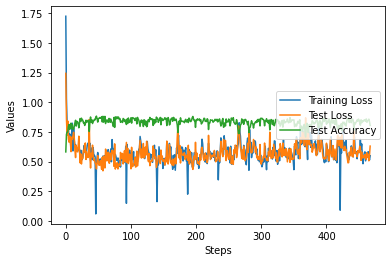

In [10]:
fig = plt.figure()                                                               #Added code
ax1 = fig.add_subplot(111)                                                       #Added code
ax1.plot(teststeps, trainingloss, label="Training Loss")                         #Added code
ax1.plot(teststeps, testloss, label="Test Loss")                                 #Added code
ax1.plot(teststeps, testacc, label="Test Accuracy")                              #Added code
plt.legend(loc = "center right")                                                 #Added code
plt.xlabel('Steps')                                                              #Added code
plt.ylabel('Values')                                                             #Added code
plt.show()                                                                       #Added code

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


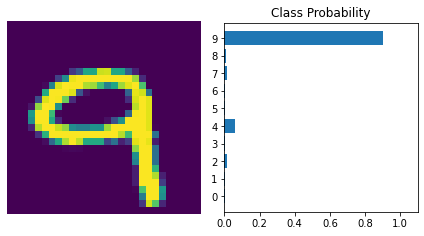

In [11]:
images, labels = next(iter(testloader))
img = images[4].view(1, 784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helperfuncs.view_classify(img.view(1, 28, 28), ps)
